<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/tf_practice/enhanced_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TPU 사용: https://wikidocs.net/119990

In [ ]:
!pip show tensorflow

In [1]:
# TPU 설정
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy 
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.69.6.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.69.6.226:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


     |████████████████████████████████| 489.5 MB 23 kB/s 
4431872/4422102 [==============================] - 0s 0us/step


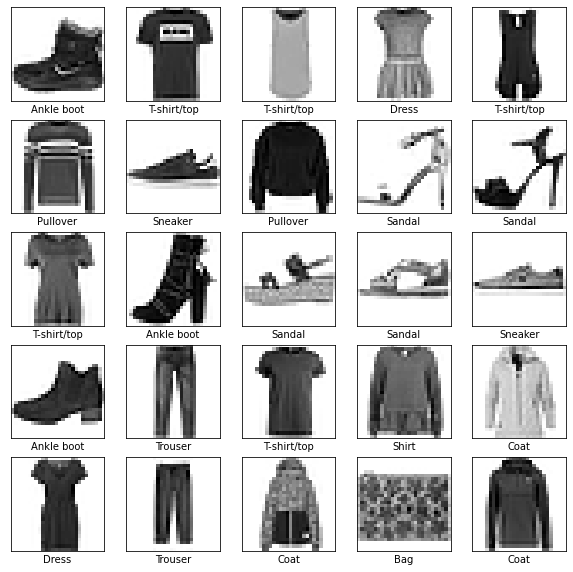

In [2]:
!pip install -q tensorflow-gpu==2.7.0-rc1
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

# data (60000, 28, 28의 형태를 가지고 있음)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

# label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# data check
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [ ]:
# data shape
train_images.shape

(60000, 28, 28)

In [38]:
# TPU를 사용하는 모델 생성
def create_model():
  return tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='relu'),
    tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

with strategy.scope():
  model = create_model()
  # 모델 컴파일
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [42]:
# 모델 형태 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [39]:
# 모델 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 31s 15ms/step - loss: 0.8238 - accuracy: 0.7501
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5928 - accuracy: 0.8171
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5529 - accuracy: 0.8316
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5210 - accuracy: 0.8410
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5018 - accuracy: 0.8507
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4850 - accuracy: 0.8574
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4739 - accuracy: 0.8599
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4670 - accuracy: 0.8622
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4550 - accuracy: 0.8675
Epoch 10/10
1875/1875 [==============================] - 27s 14ms/step - lo

In [40]:
# 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 5s - loss: 0.3955 - accuracy: 0.8841 - 5s/epoch - 17ms/step

Test accuracy: 0.8840999603271484


In [41]:
# 학습+평가
epochs = [5, 10, 15, 20, 25]

for e in epochs:
  history = model.fit(train_images, train_labels, epochs=e, verbose=0)
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print('\nEpoch: ',e,' | Test accuracy: ', test_acc, ' | Test loss: ', test_loss, " | Train Accuracy: ", sum(history.history['accuracy'])/len(history.history['accuracy']), " | Train loss:", sum(history.history['loss'])/len(history.history['loss']), "\n")

313/313 - 3s - loss: 0.3851 - accuracy: 0.8913 - 3s/epoch - 10ms/step

Epoch:  5  | Test accuracy:  0.8912999629974365  | Test loss:  0.3851468861103058  | Train Accuracy:  0.8736266851425171  | Train loss: 0.43500919342041017 

313/313 - 3s - loss: 0.3805 - accuracy: 0.8907 - 3s/epoch - 10ms/step

Epoch:  10  | Test accuracy:  0.8906999826431274  | Test loss:  0.380513072013855  | Train Accuracy:  0.8829250156879425  | Train loss: 0.41118032336235044 

313/313 - 3s - loss: 0.3723 - accuracy: 0.8962 - 3s/epoch - 11ms/step

Epoch:  15  | Test accuracy:  0.8962000012397766  | Test loss:  0.37229740619659424  | Train Accuracy:  0.8903144518534343  | Train loss: 0.39156374136606853 


Epoch:  20  | Test accuracy:  0.8942999839782715  | Test loss:  0.377135306596756  | Train Accuracy:  0.8951850056648254  | Train loss: 0.37715741246938705 

313/313 - 3s - loss: 0.3671 - accuracy: 0.8991 - 3s/epoch - 11ms/step

Epoch:  25  | Test accuracy:  0.8991000056266785  | Test loss:  0.367050766944885

In [ ]:
probability_model = tf.keras.Sequential([model])

# 예측!                                         
predictions = probability_model.predict(test_images)
# 같은 결과가 나온다
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


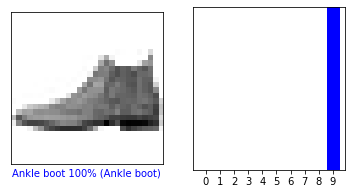

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
  

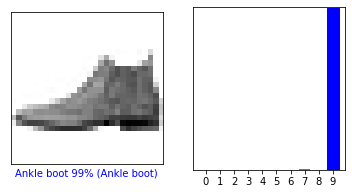

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

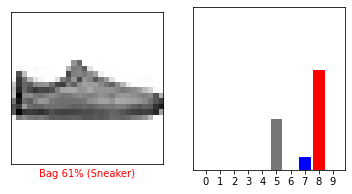

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

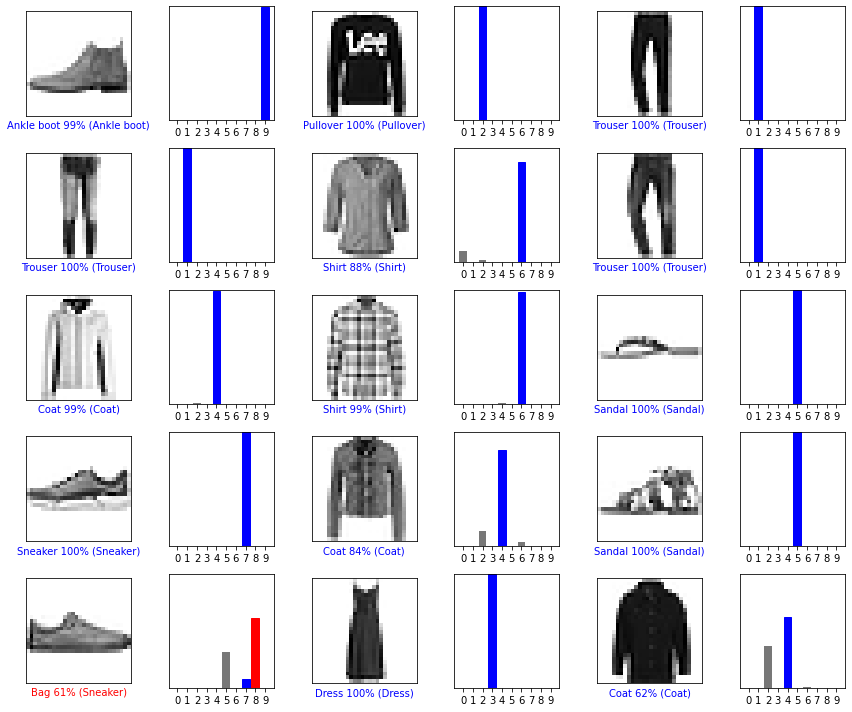

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()